In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1. Предобработка данных

### Обработка данных

In [2]:
df = pd.read_csv('data/SpotifyFeatures.csv')
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [4]:
print(df.isna().sum())

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


In [5]:
print(df.isnull().sum())

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


Хороший датасет -- пропусков нет

### Графики

In [6]:
plt.rcParams['figure.figsize'] = (10, 5)

In [7]:
sortedByPopularity = df.sort_values(by='popularity')

На мой взгляд рисовать здесь 'простой график' -- неуместно, поскольку он хорошо отображает поведение какой-то непрерывной фичи, в то время как здесь мы имеем датасет с каким-то семплом информации о треках без привязки к параметру, относительно которого можно рассматривать псевдо-непрерывность

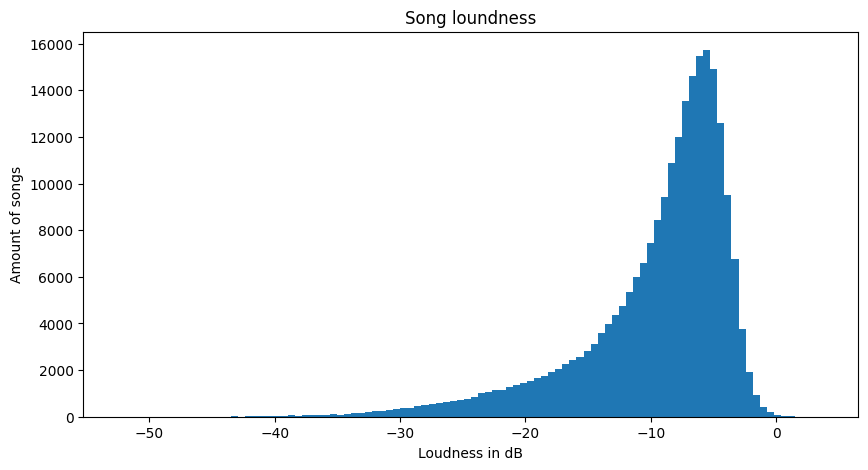

In [8]:
plt.hist(df.loudness, bins=100)
plt.title('Song loundness')
plt.xlabel('Loudness in dB')
plt.ylabel('Amount of songs')
plt.show()

Гистограма хорошо отображает распределение количественного (может и вероятностного -- density=True) значение признака

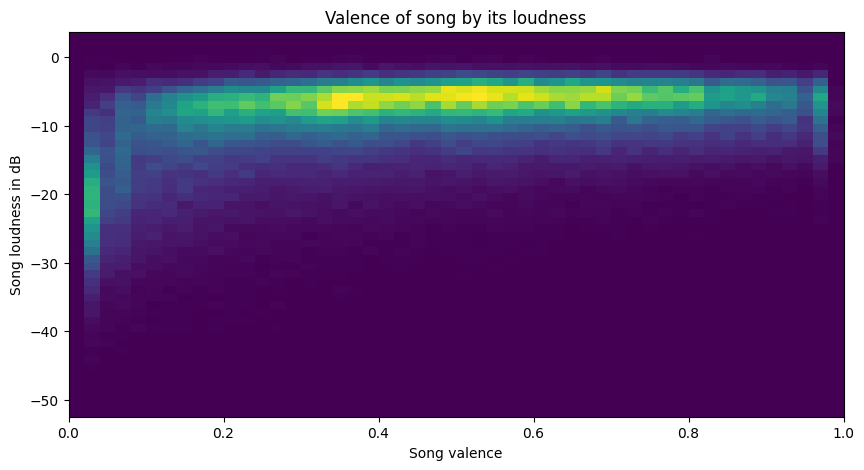

In [9]:
plt.hist2d(df.valence, df.loudness, bins=50)
plt.title('Valence of song by its loudness')
plt.xlabel('Song valence')
plt.ylabel('Song loudness in dB')
plt.show()

2Д гистограмма позволяет проследить какую-то вЗаИмОсВяЗь двух признаков, здесь, например, видно, что тихие песни чаще грустные чем веселые

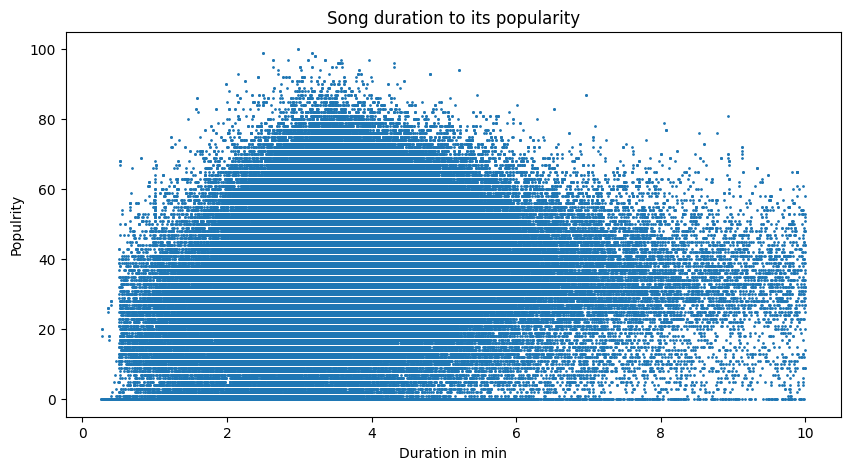

In [10]:
repeatable = df[(df.duration_ms <= 10 * 60 * 1000)]
plt.scatter(repeatable.duration_ms.apply(lambda ms: ms / 1000. / 60.), repeatable.popularity, s=1)
plt.title("Song duration to its popularity")
plt.xlabel("Duration in min")
plt.ylabel("Populrity")
plt.show()

'натягиваем сову на глобус': короткие песни -- более популярные

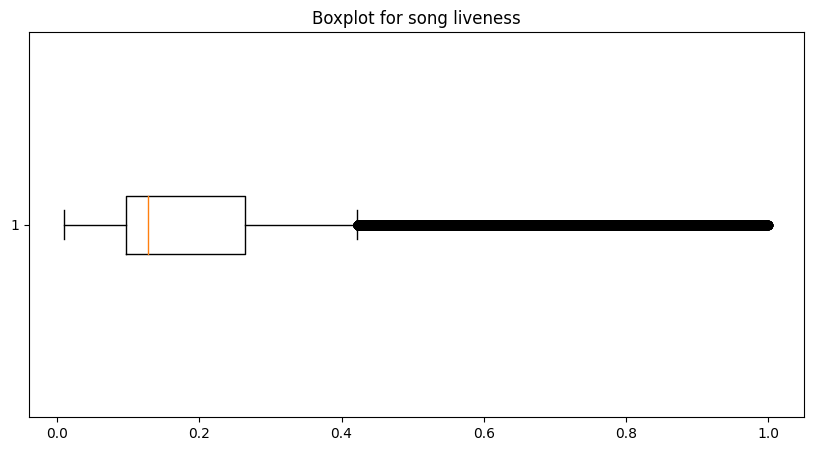

In [11]:
plt.boxplot(df.liveness, whis=0.95, vert=False)
plt.title("Boxplot for song liveness")
plt.show()

Песен с чистым живым исполнением - мало

### Новая колонка

In [12]:
def get_music_sheets(duration_ms: float, bpm: float) -> float:
    return (duration_ms / 1000 / 60) * bpm

dfNew = df.assign(music_sheets=df.apply(lambda row: get_music_sheets(row.duration_ms, row.tempo), axis=1))
dfNew.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,music_sheets
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,276.536841
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,398.388569
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,282.325388
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,436.342611
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,193.584867


Посчитали число четвертных нот в песне

### Сохранить датасет

In [13]:
dfNew.to_csv('data/spotify_modified.csv', index=False)
!cat data/spotify_modified.csv | head -n 5

genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,music_sheets
Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.91,0.0,C#,0.346,-1.828,Major,0.0525,166.969,4/4,0.814,276.53684061666667
Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.59,137373,0.737,0.0,F#,0.151,-5.559,Minor,0.0868,174.003,4/4,0.816,398.3885686499999
Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.0,C,0.103,-13.879,Minor,0.0362,99.488,5/4,0.368,282.32538826666666
Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.24,152427,0.326,0.0,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,436.3426111
cat: write error: Broken pipe


## 2. Интерполяция кривой

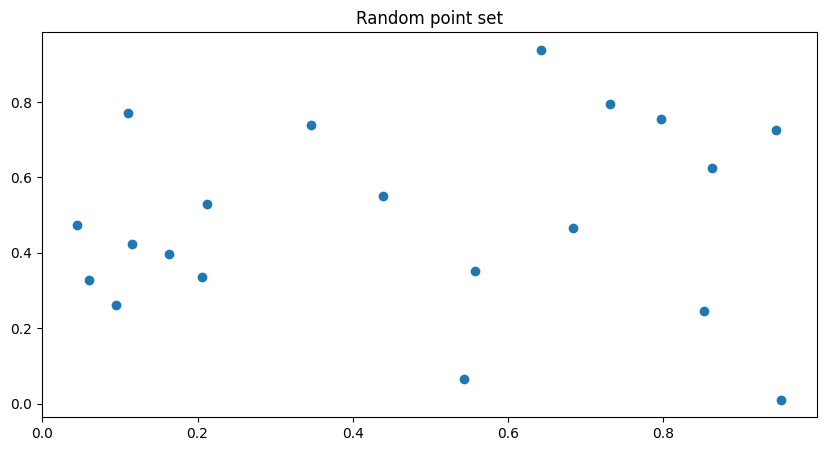

In [42]:
(xs, ys) = np.random.random(size=(2, 20))
xs.sort()
plt.scatter(xs, ys)
plt.title("Random point set")
plt.show()

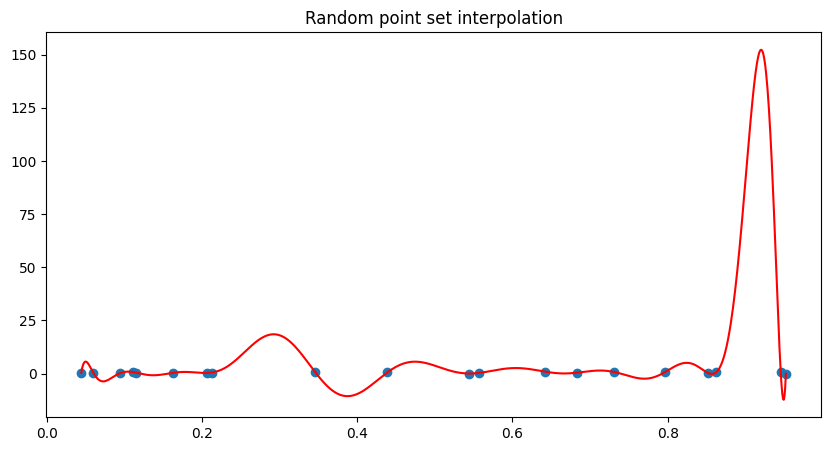

In [43]:
import scipy.interpolate as inter

interpolator = inter.KroghInterpolator(xs, ys)

plt.scatter(xs, ys)
plt.title("Random point set interpolation")
x = np.linspace(min(xs), max(xs), 1000)
plt.plot(x, [interpolator(xi) for xi in x], color='red')
plt.show()

[Как эта интерполяция работает?](https://www.ams.org/journals/mcom/1970-24-109/S0025-5718-1970-0258240-X/S0025-5718-1970-0258240-X.pdf)

### Своя реализация интерполяции

In [44]:
class BarycantricInterpolator:

    def __init__(self, xs, ys):
        assert(xs.size == ys.size and xs.size != 0)
        self.xs = xs
        self.ys = ys
        self.n = self.xs.size
        self.eps = 1e-6
        self.ws = self._CalculateWeights(xs)

    def __call__(self, x):
        numenator = 0.0
        denominator = 0.0
        for i in range(0, self.n):
            coeff = self.ws[i] / (x - self.xs[i] + self.eps)
            numenator += coeff * self.ys[i]
            denominator += coeff
        return numenator / (denominator + self.eps)

    def _CalculateWeights(self, xs):
        n = xs.size
        w = np.zeros(n)
        for j in range(n):
            w[j] = 1
            for k in range(0, j):
                w[k] = w[k] / (xs[k] - xs[j] + self.eps)
                w[j] = w[j] / (xs[j] - xs[k] + self.eps)
        return w

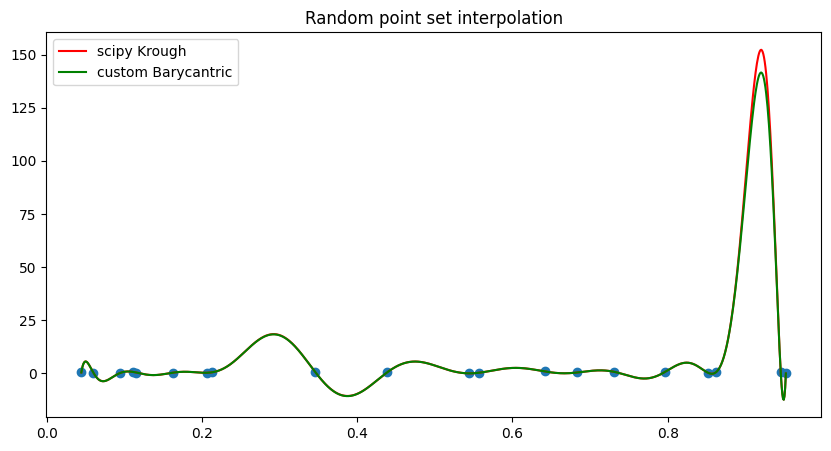

In [45]:
from matplotlib.pyplot import title


customBarycantricInterpolator = BarycantricInterpolator(xs, ys)
scipyBarycantricInterpolator = inter.BarycentricInterpolator(xs, ys)


plt.scatter(xs, ys)
plt.title("Random point set interpolation")
x = np.linspace(min(xs), max(xs), 1000)
plt.plot(x, [interpolator(xi) for xi in x], color='red', label='scipy Krough')
# plt.plot(x, [scipyBarycantricInterpolator(xi) for xi in x], color='purple', label='scipy Barycantric')
plt.plot(x, [customBarycantricInterpolator(xi) for xi in x], color='green', label='custom Barycantric')
plt.legend()
plt.show()

o_O

[Как это работает?](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf)

## 3. Быстрая гистограмма

In [46]:
from typing import List, Tuple, Union

def lower_bound(list: List[float], 
                begin: int,
                end: int,
                value: float) -> int:
    l = begin
    r = end
    while r - l > 1:
        m = (l + r) // 2
        if list[m] <= value:
            l = m
        else:
            r = m
    return l

def fast_hist(array: List[Union[int, float]], 
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param array: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists: 
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    minValue = min(array) * 1.0
    maxValue = max(array) * 1.0
    step = (maxValue - minValue) / bins
    bins_names = [minValue]
    for i in range(1, bins):
        bins_names.append(bins_names[-1] + step)

    value_counts = [0] * bins
    for value in array:
        value_counts[lower_bound(bins_names, 0, bins, float(value))] += 1

    return (value_counts, bins_names)

In [47]:
def defaultHist(x, bins):
    value_counts, bins_names, visual_figure = plt.hist(x, bins=bins, width=0.8)
    plt.title('Default hist')
    print('Значения колонок:', value_counts)
    print('Названия колонок:', bins_names)
    plt.show(visual_figure)

def fastHist(x, bins):
    value_counts, bins_names = fast_hist(x, bins)
    plt.bar(x=bins_names, height=value_counts, width=0.8)
    plt.title('Fast hist')
    print('Значения колонок:', value_counts)
    print('Названия колонок:', bins_names)
    plt.show()

Значения колонок: [3. 2. 2. 2.]
Названия колонок: [1.   1.75 2.5  3.25 4.  ]


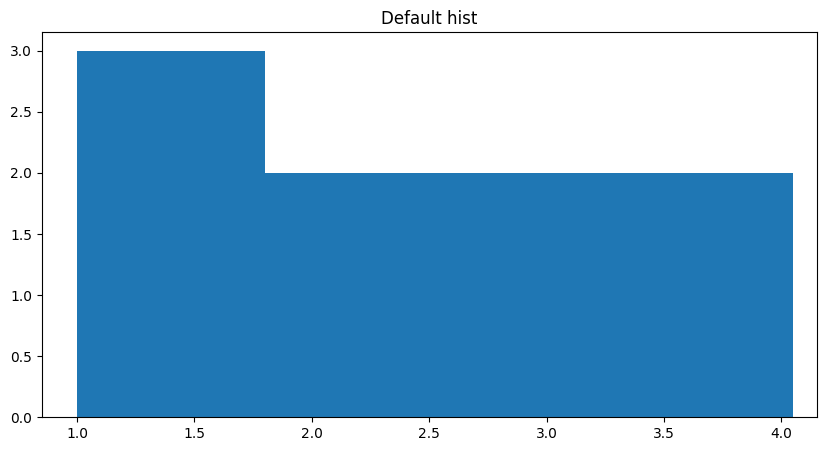

Значения колонок: [3, 2, 2, 2]
Названия колонок: [1.0, 1.75, 2.5, 3.25]


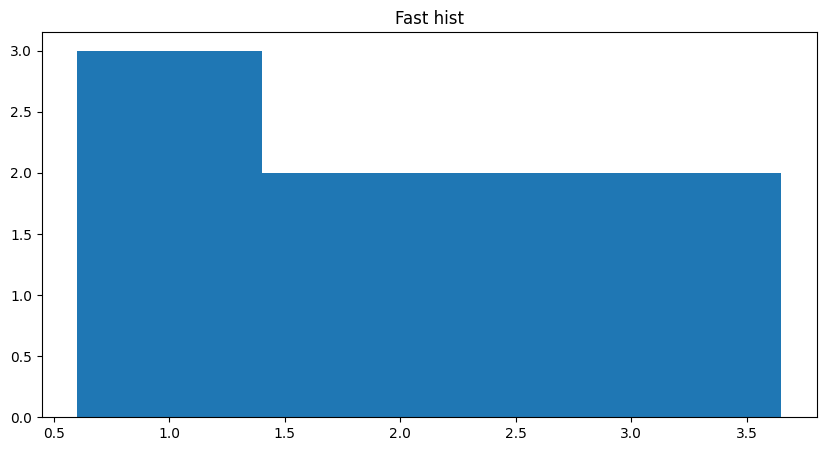

In [48]:
# Пример гистограммы с помощью plt.hist()

array = [1,1,2,3,4,1,2,3,4]

defaultHist(array, len(set(array)))
fastHist(array, len(set(array)))

### Benchmark

Значения колонок: [5. 2. 4. 6. 7. 7. 4. 6. 3. 4. 6. 8. 2. 6. 3. 5. 5. 8. 4. 5.]
Названия колонок: [ 0.63857654  3.09482625  5.55107596  8.00732567 10.46357539 12.9198251
 15.37607481 17.83232452 20.28857423 22.74482395 25.20107366 27.65732337
 30.11357308 32.56982279 35.02607251 37.48232222 39.93857193 42.39482164
 44.85107135 47.30732107 49.76357078]


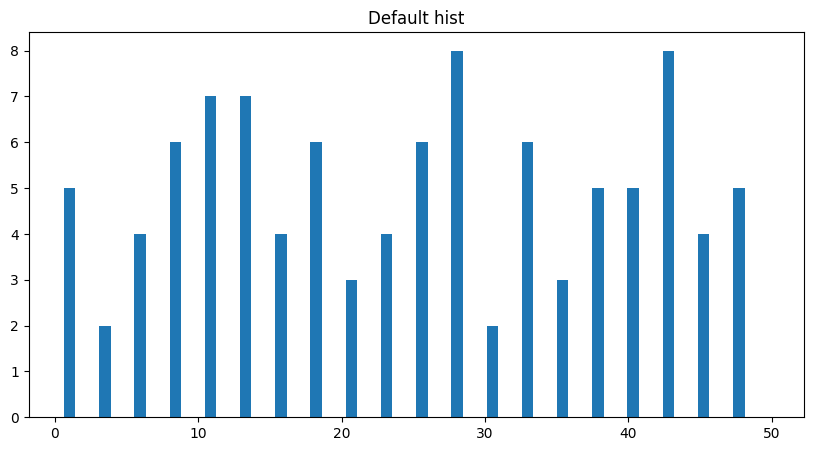

Значения колонок: [5, 2, 4, 6, 7, 7, 4, 6, 3, 4, 6, 8, 2, 6, 3, 5, 5, 8, 4, 5]
Названия колонок: [0.6385765375576391, 3.09482624956342, 5.551075961569201, 8.007325673574982, 10.463575385580764, 12.919825097586546, 15.376074809592328, 17.83232452159811, 20.288574233603892, 22.744823945609674, 25.201073657615456, 27.65732336962124, 30.11357308162702, 32.5698227936328, 35.02607250563858, 37.48232221764436, 39.93857192965014, 42.394821641655916, 44.851071353661695, 47.30732106566747]


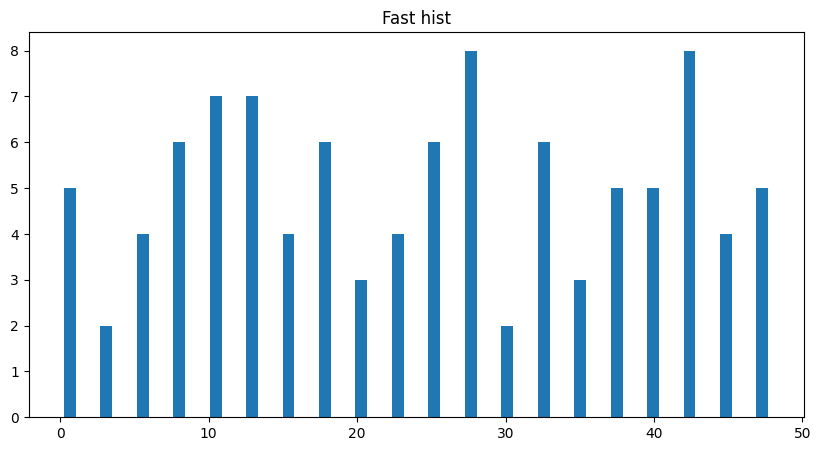

In [49]:
import timeit

x = np.random.random(100) * 50
bins = 20

defaultHist(x, bins)
fastHist(x, bins)

In [56]:
defaultSetup = '''
value_counts, bins_names, visual_figure = plt.hist(x, bins=bins, width=0.8)
'''
fastSetup = '''
value_counts_fast, bins_names_fast = fast_hist(x, bins)
plt.bar(x=bins_names_fast, height=value_counts_fast, width=0.8)
'''


1.9854567849997693

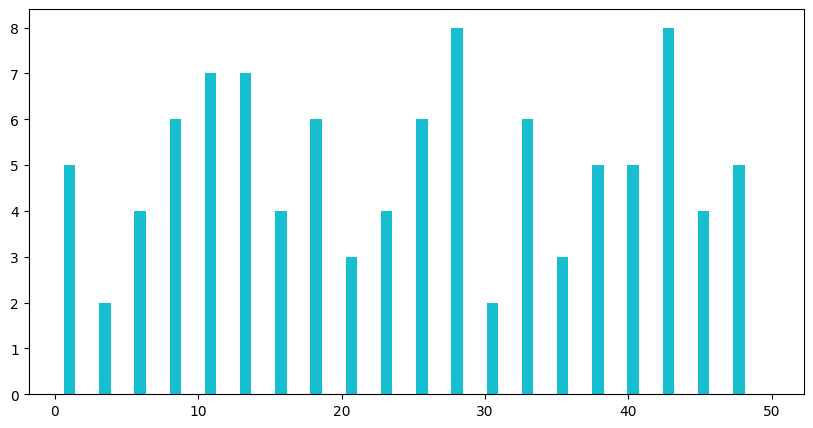

In [57]:
timeit.timeit(defaultSetup, number=100, globals=globals())

1.96852521899973

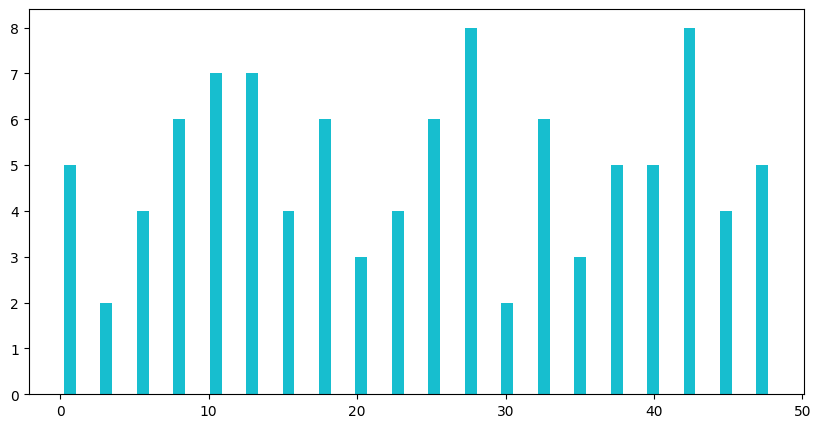

In [58]:
timeit.timeit(fastSetup, number=100, globals=globals())

In [59]:
defaultSetupNoDrawing = '''
value_counts, bins_names, visual_figure = plt.hist(x, bins=bins, width=0.8)
'''
fastSetupNoDrawing = '''
value_counts_fast, bins_names_fast = fast_hist(x, bins)
'''

1.9638417629998912

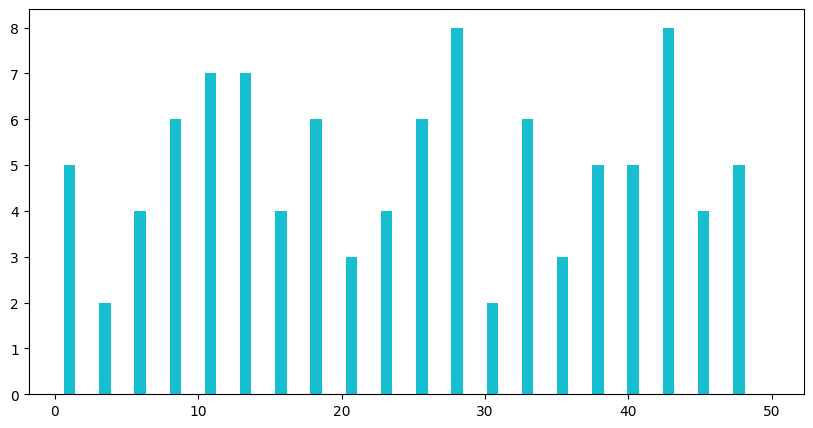

In [60]:
timeit.timeit(defaultSetupNoDrawing, number=100, globals=globals())

In [61]:
timeit.timeit(fastSetupNoDrawing, number=100, globals=globals())

0.015244996000092215